## Importing Modules

In [9]:
# importing classes
from Code.momenta import Momenta
from Code.state_config import StateConfig
from Code.hamiltonian import Hamiltonian
from Code.time_evolution import TimeEvolution

# importing libraries
import numpy as np
import os
import matplotlib.pyplot as plt


## Setting Parameters

In [5]:
angle = 26.56 / 180. * np.pi  # sin(2*angle)=0.8
wbar = 1.0                    # dm**2/(4*T*f)
tbar = 10000                  # T/f
dt = 0.01                     # time step


## Momentum Lattice

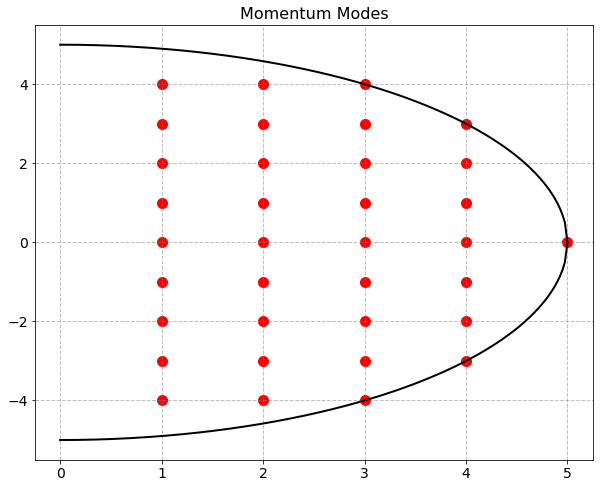

In [10]:
# setting file paths
file_dir = '/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/'
input_path = os.path.join(file_dir, 'P35.npy')
figure_path = os.path.join(file_dir, 'Plots/momentum_modes.png')

# loading in momentum lattice
P = np.load(input_path)

plt.figure(figsize = (10, 8), facecolor='white')

# plotting momentum modes
plt.grid(color = 'gray', linestyle = '--', linewidth = 1, alpha = 0.5)
plt.scatter(P[:,0], P[:,1], color = 'red', s = 100)

xs = np.linspace(0, P.max(), 200)
ys = np.sqrt(P.max()**2 - xs**2)
plt.plot(xs, ys, color = 'black', linewidth = 2)
plt.plot(xs, -ys, color = 'black', linewidth = 2)

plt.title('Momentum Modes', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize = 14)

plt.savefig(figure_path, bbox_inches='tight', dpi = 200)
plt.show()


## Creating Momenta Pairs

In [11]:
%%time

# creating a momentum object
momenta = Momenta(P)

# printing the number of momentum pairs
print(momenta)


Total number of conserved momenta pairs for 35 momentum modes: 2727
CPU times: user 38.6 s, sys: 153 ms, total: 38.8 s
Wall time: 39.4 s


## 18 Neutrinos with 1600 States

In [13]:
# setting file path 
file_path = os.path.join(file_dir, 'N18_s1600')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

# printing the activated states
config.print_basis()

init_state = config.init_state


Number of neutrinos: 18
Initial state: [ 0  1  2  8 10 12 14 15 17 20 24 25 26 27 28 30 31 34]
Activated bins: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34] 

For 18 neutrinos with an initial state of [0,1,2,8,10,12,14,15,17,20,24,25,26,27,28,30,31,34], 1600 states are activated:
0th state: (0,1,2,8,10,12,14,15,17,20,24,25,26,27,28,30,31,34)
1th state: (0,1,6,7,8,10,14,15,17,20,24,25,26,27,28,30,31,34)
2th state: (0,1,2,8,10,11,14,15,17,21,24,25,26,27,28,30,31,34)
3th state: (0,1,2,8,10,11,12,15,17,23,24,25,26,27,28,30,31,34)
4th state: (0,1,2,8,10,12,14,15,17,20,21,25,27,28,29,30,31,34)
5th state: (0,1,2,8,10,12,14,15,17,20,22,24,25,26,30,31,33,34)
6th state: (1,2,6,7,8,10,14,15,17,20,24,25,26,27,28,30,31,32)
7th state: (0,2,6,7,8,10,14,15,17,20,24,25,26,27,28,30,31,33)
8th state: (0,1,6,7,8,10,11,15,17,23,24,25,26,27,28,30,31,34)
9th state: (0,1,6,7,8,10,14,15,17,20,21,25,27,28,29,30,31,34)
10th stat

In [14]:
%%time

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Constructing 0th column of the Hamiltonian
Constructing 50th column of the Hamiltonian
Constructing 100th column of the Hamiltonian
Constructing 150th column of the Hamiltonian
Constructing 200th column of the Hamiltonian
Constructing 250th column of the Hamiltonian
Constructing 300th column of the Hamiltonian
Constructing 350th column of the Hamiltonian
Constructing 400th column of the Hamiltonian
Constructing 450th column of the Hamiltonian
Constructing 500th column of the Hamiltonian
Constructing 550th column of the Hamiltonian
Constructing 600th column of the Hamiltonian
Constructing 650th column of the Hamiltonian
Constructing 700th column of the Hamiltonian
Constructing 750th column of the Hamiltonian
Constructing 800th column of the Hamiltonian
Constructing 850th column of the Hamiltonian
Constructing 900th column of the Hamiltonian
Constructing 950th column of the Hamiltonian
Constructing 1000th column of the Hamiltonian
Constructing 1050th column of the Hamiltonian
Constructin

In [19]:
%%time

# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 5000, hamiltonian)


CPU times: user 9min 20s, sys: 2min 5s, total: 11min 25s
Wall time: 1min 43s


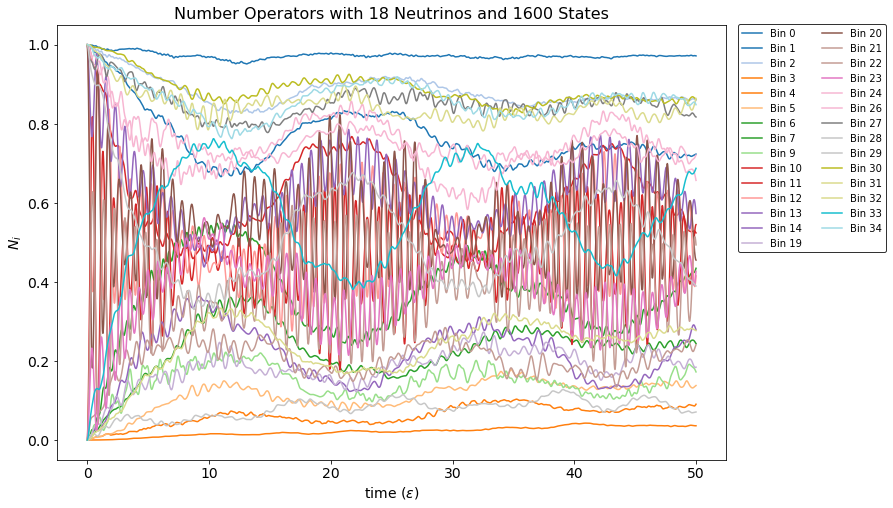

In [20]:
# plotting number operators
te.plot_number_operators(file_path)


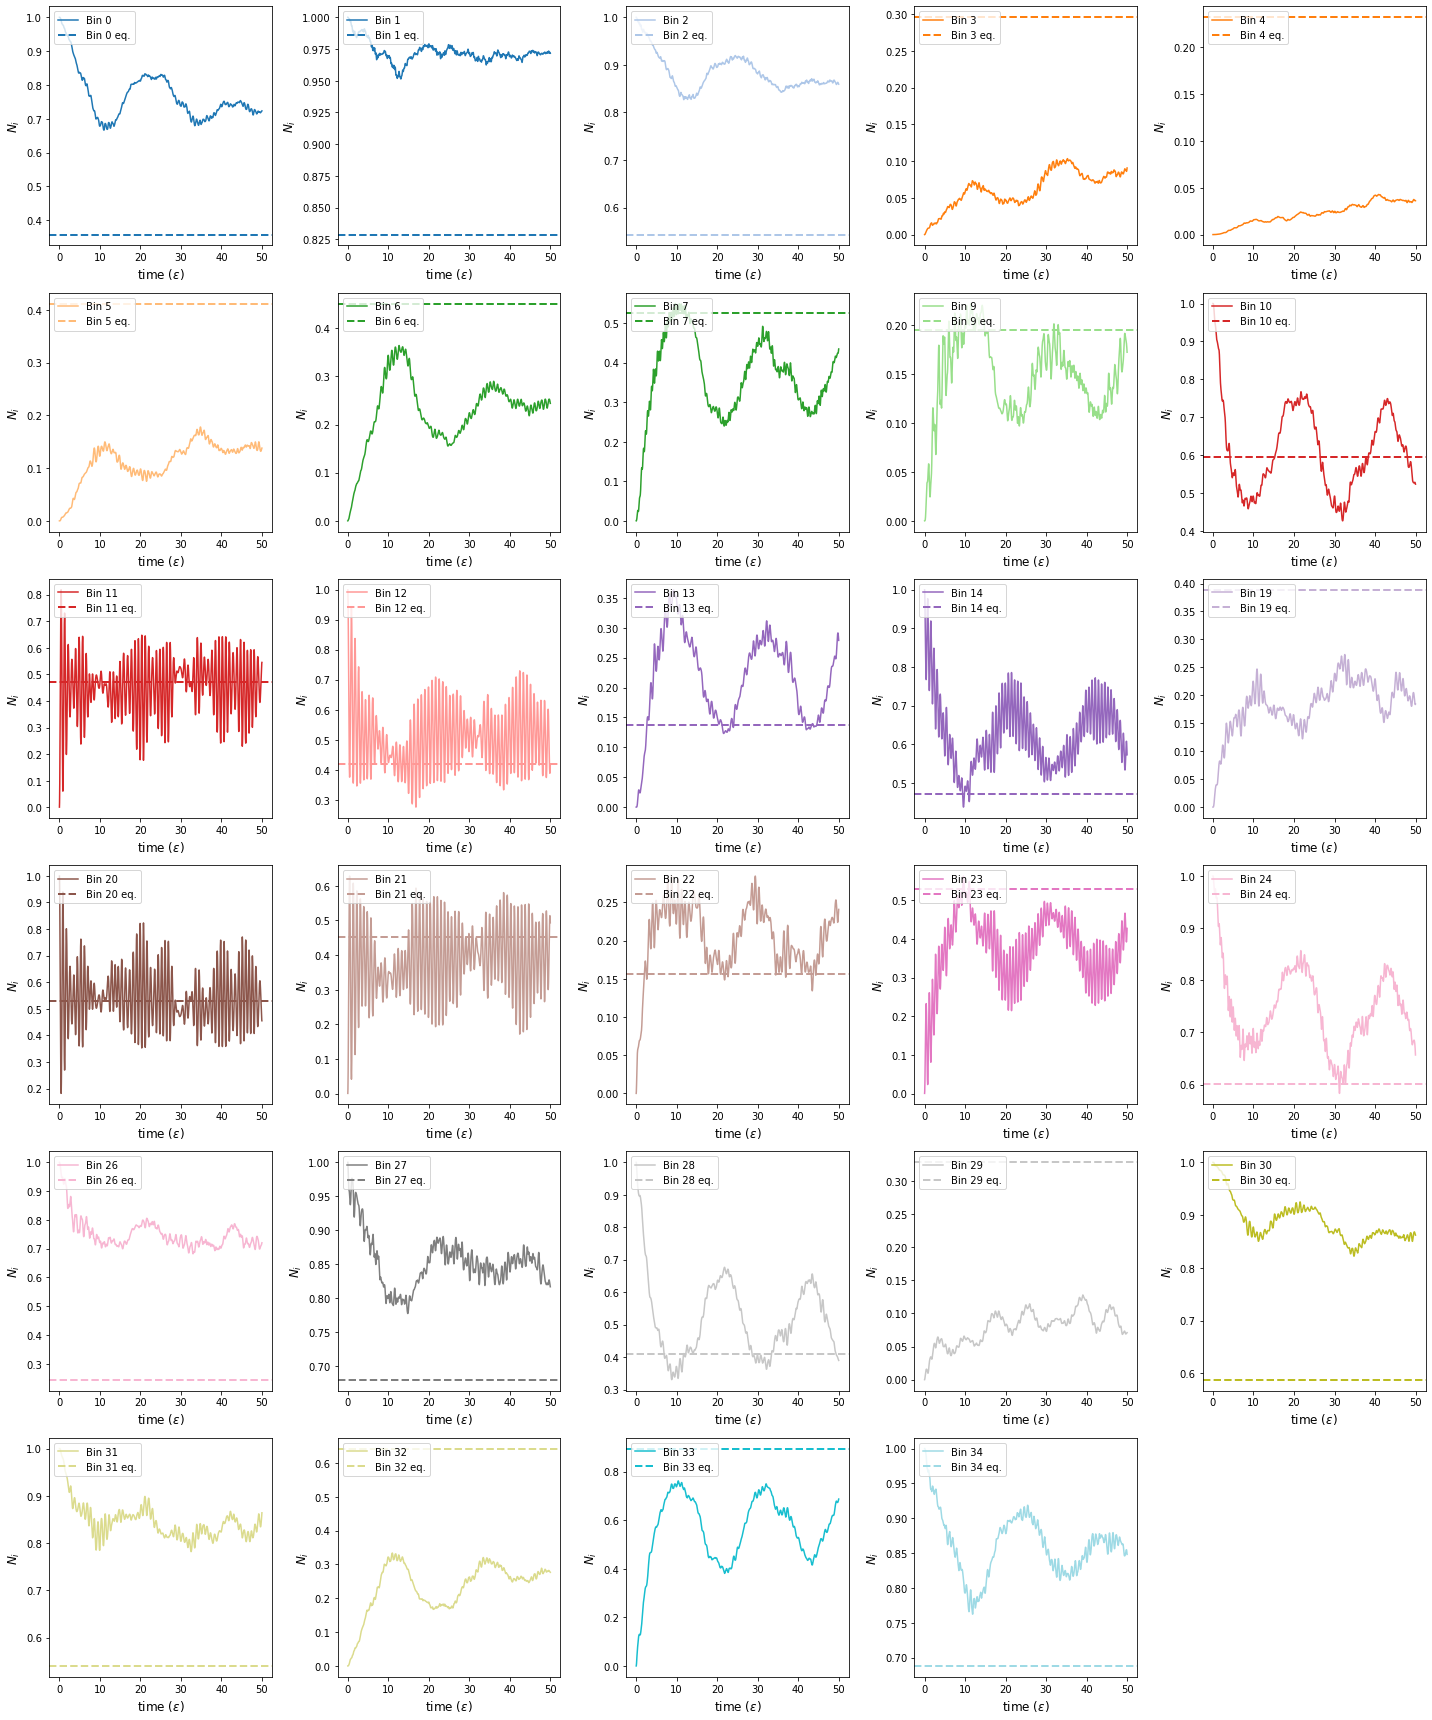

In [21]:
# plotting number operators with their equilibrium values
te.plot_eq(file_path)


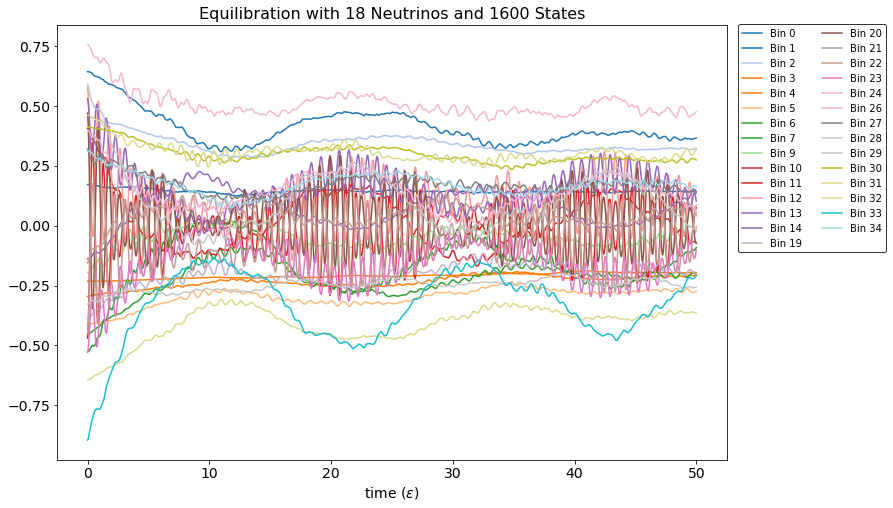

In [22]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)


## 12 Neutrinos with 518 States

In [23]:
# setting file path 
file_path = os.path.join(file_dir, 'N12_s518')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

# printing the activated states
config.print_basis()

init_state = config.init_state


Number of neutrinos: 12
Initial state: [ 0  1  2  8 14 17 20 24 26 27 30 31]
Activated bins: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34] 

For 12 neutrinos with an initial state of [0,1,2,8,14,17,20,24,26,27,30,31], 518 states are activated:
0th state: (0,1,2,8,14,17,20,24,26,27,30,31)
1th state: (0,1,2,7,14,17,20,25,26,27,30,31)
2th state: (0,1,2,9,14,17,20,24,25,27,30,31)
3th state: (0,1,2,10,14,17,20,24,25,26,30,31)
4th state: (0,1,2,8,11,17,23,24,26,27,30,31)
5th state: (0,1,2,8,14,17,20,21,27,29,30,31)
6th state: (0,1,2,8,14,17,20,21,26,27,30,34)
7th state: (0,1,2,7,11,17,23,25,26,27,30,31)
8th state: (0,1,4,6,14,17,20,24,25,27,30,31)
9th state: (0,1,2,9,11,17,23,24,25,27,30,31)
10th state: (0,1,2,9,14,17,20,21,25,27,30,34)
11th state: (0,1,2,10,11,17,23,24,25,26,30,31)
12th state: (0,1,2,10,14,17,20,21,25,29,30,31)
13th state: (0,1,2,10,14,17,20,21,25,26,30,34)
14th state: (0,1,2,8,11,17,21,23,27,29,30,31)
15th state: (0

In [24]:
%%time

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Constructing 0th column of the Hamiltonian
Constructing 50th column of the Hamiltonian
Constructing 100th column of the Hamiltonian
Constructing 150th column of the Hamiltonian
Constructing 200th column of the Hamiltonian
Constructing 250th column of the Hamiltonian
Constructing 300th column of the Hamiltonian
Constructing 350th column of the Hamiltonian
Constructing 400th column of the Hamiltonian
Constructing 450th column of the Hamiltonian
Constructing 500th column of the Hamiltonian
CPU times: user 1min 44s, sys: 423 ms, total: 1min 45s
Wall time: 1min 44s


In [25]:
%%time

# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 3000, hamiltonian)


CPU times: user 1min 19s, sys: 22.2 s, total: 1min 42s
Wall time: 17.1 s


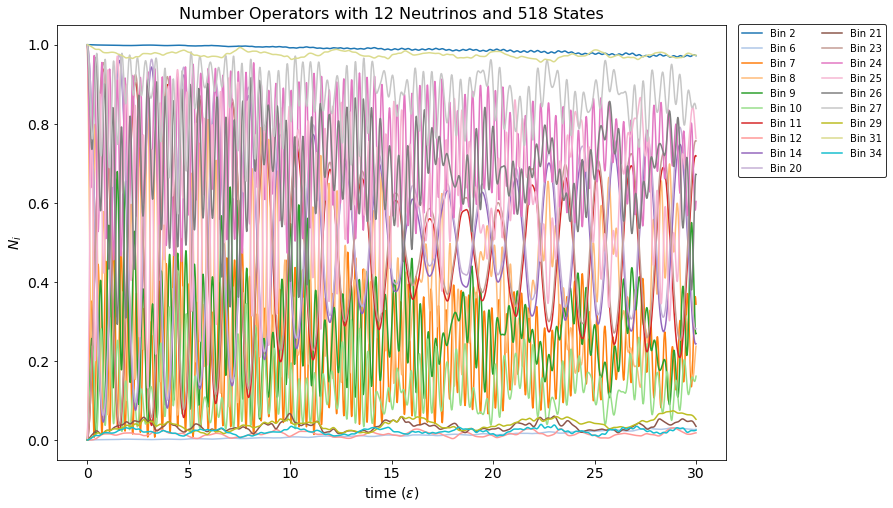

In [26]:
# plotting number operators
te.plot_number_operators(file_path)


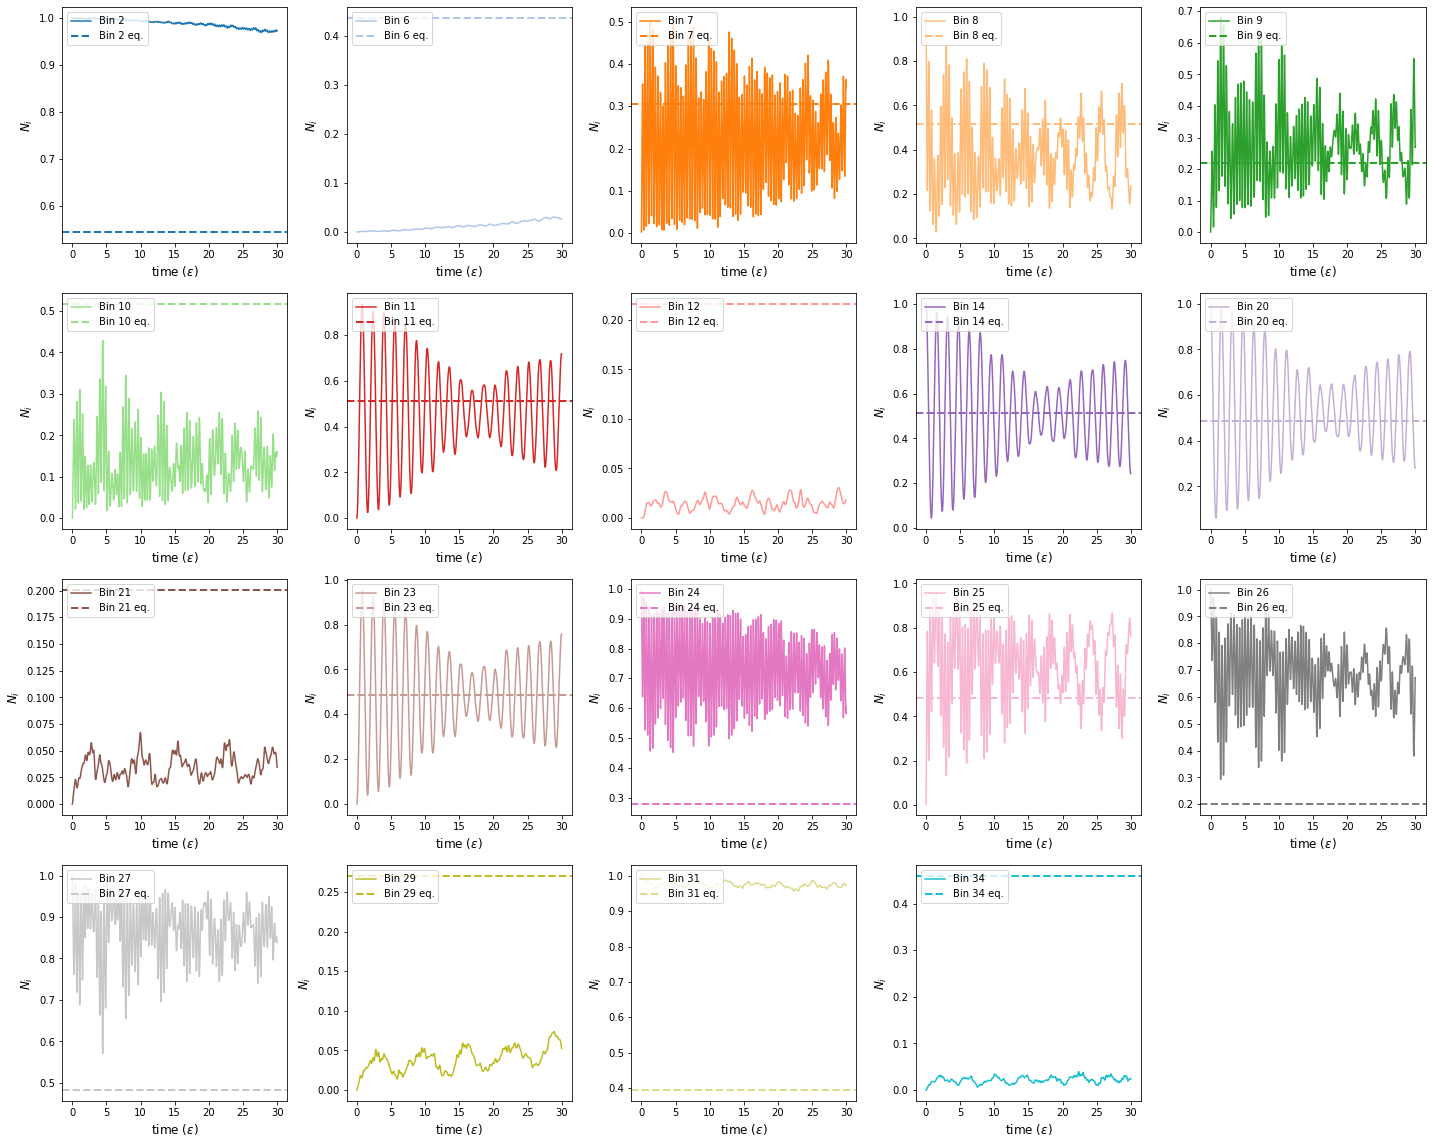

In [27]:
# plotting number operators with their equilibrium values
te.plot_eq(file_path)


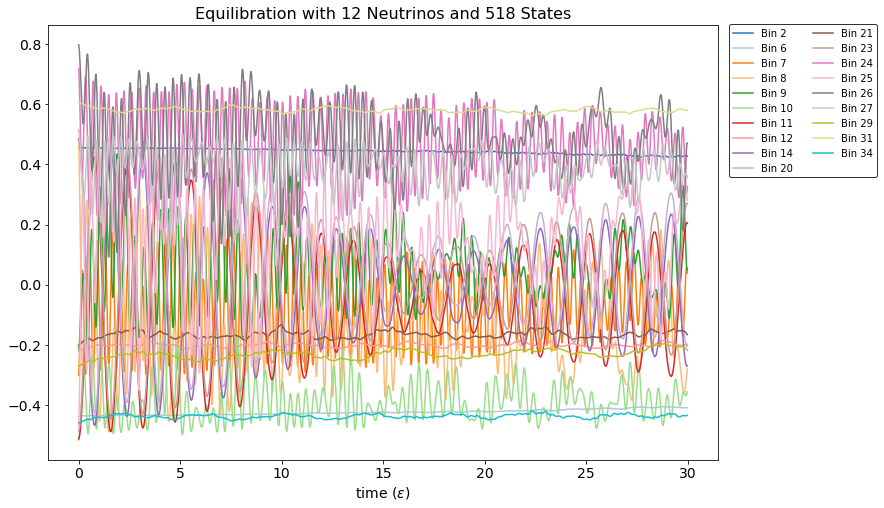

In [28]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)


## 10 Neutrinos with 192 States

In [30]:
# setting file path 
file_path = os.path.join(file_dir, 'N10_s192')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

init_state = config.init_state


Number of neutrinos: 10
Initial state: [ 0  3  4 15 20 24 26 27 28 31]
Activated bins: [0, 3, 4, 15, 20, 24, 26, 27, 28, 31] 



In [31]:
%%time

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Constructing 0th column of the Hamiltonian
Constructing 50th column of the Hamiltonian
Constructing 100th column of the Hamiltonian
Constructing 150th column of the Hamiltonian
CPU times: user 38.1 s, sys: 143 ms, total: 38.2 s
Wall time: 38.2 s


In [35]:
# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 1000, hamiltonian)


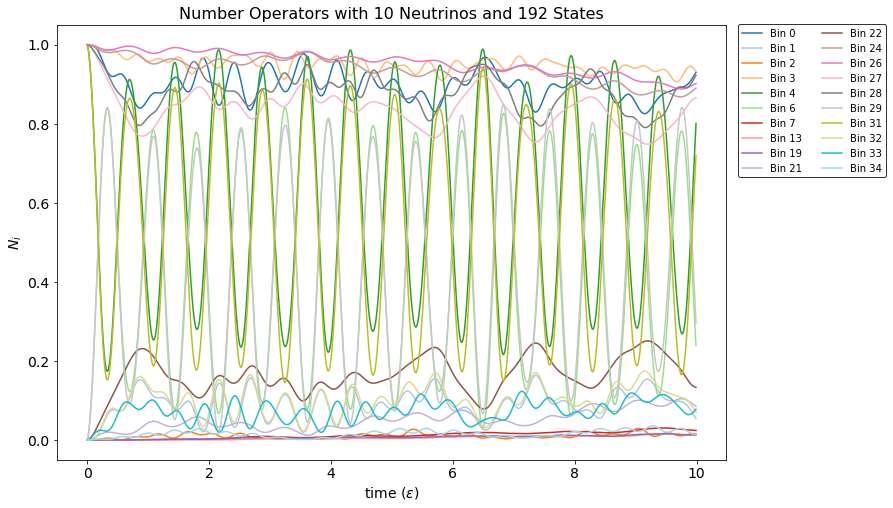

In [36]:
# plotting number operators
te.plot_number_operators(file_path)


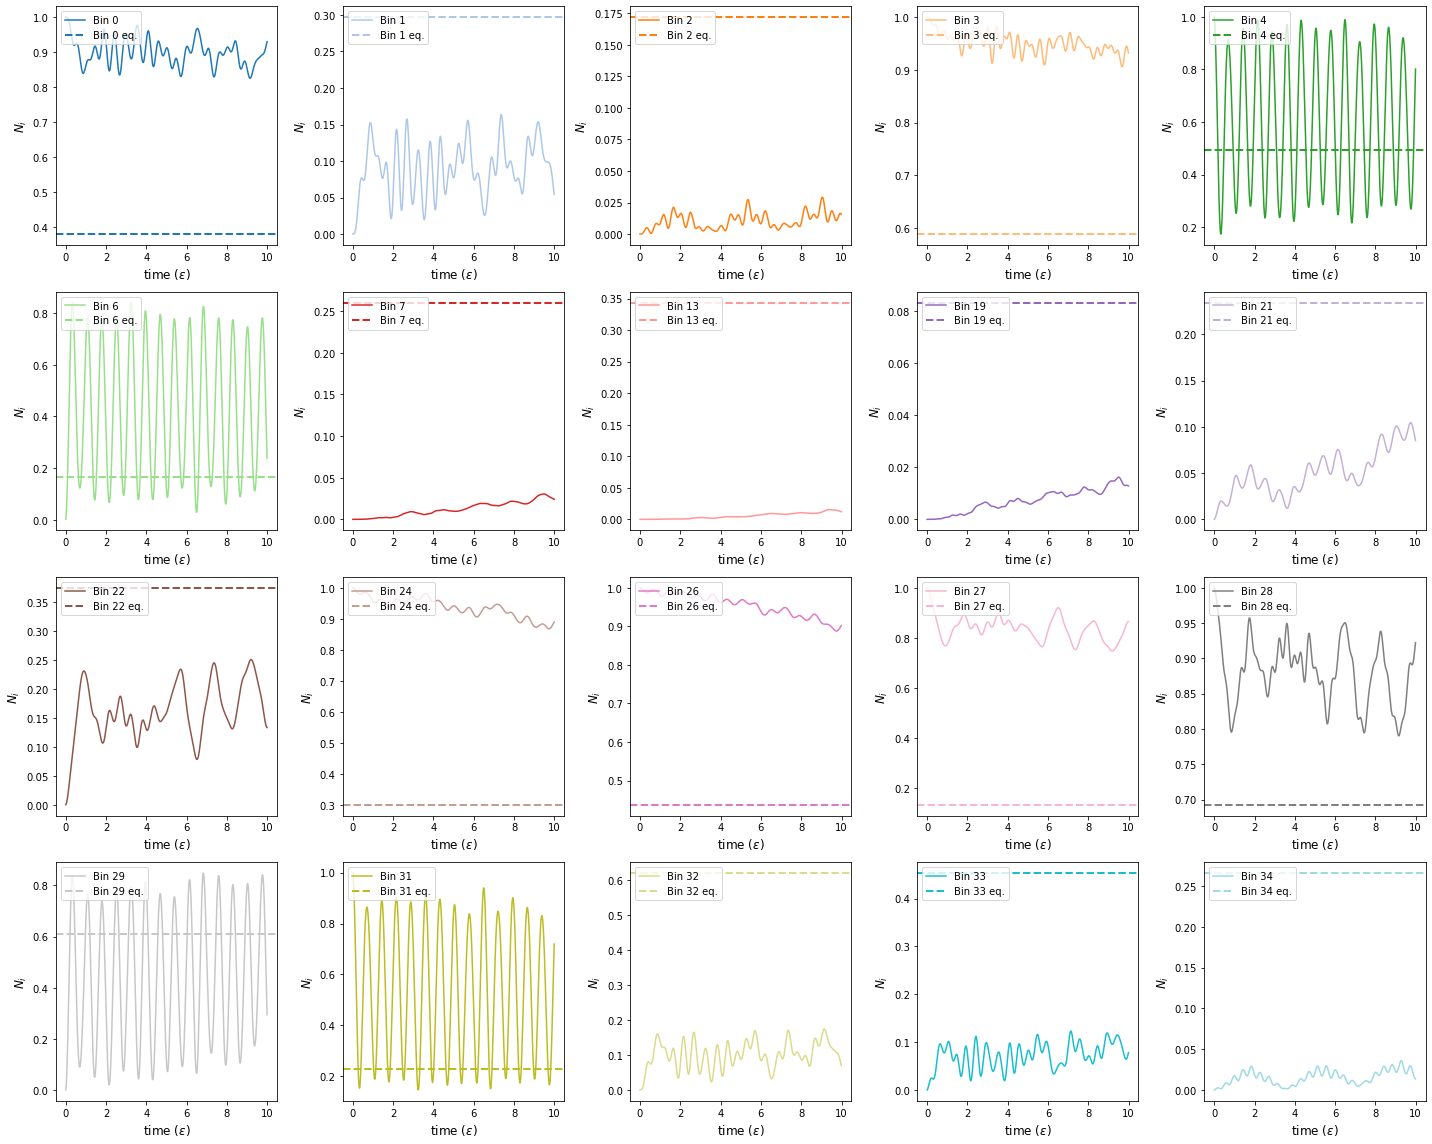

In [37]:
# plotting number operators with their equilibrium values
te.plot_eq(file_path)


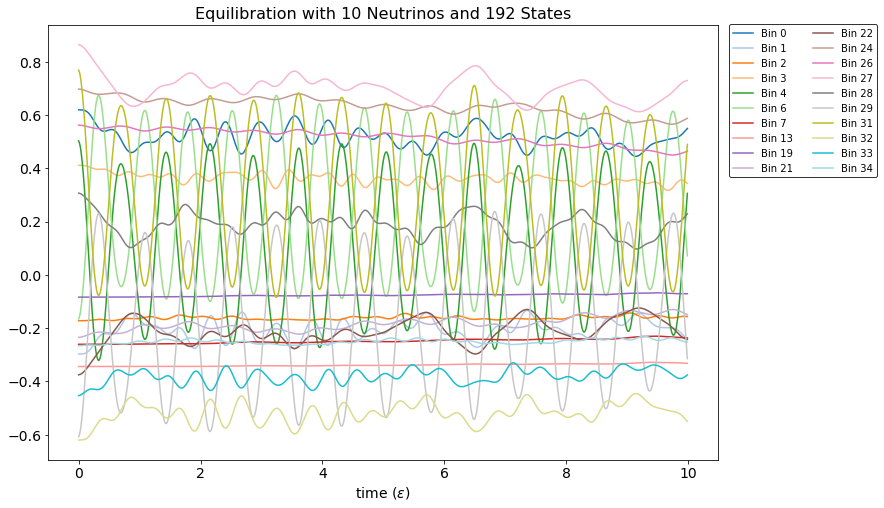

In [38]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)


## 10 Neutrinos with 142 States

In [39]:
%%time

# setting file path 
file_path = os.path.join(file_dir, 'N10_s142')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

init_state = config.init_state

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Number of neutrinos: 10
Initial state: [ 1  8 14 17 20 24 26 27 30 31]
Activated bins: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34] 

Constructing 0th column of the Hamiltonian
Constructing 50th column of the Hamiltonian
Constructing 100th column of the Hamiltonian
CPU times: user 27.9 s, sys: 47.5 ms, total: 28 s
Wall time: 27.9 s


In [40]:
# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 1000, hamiltonian)


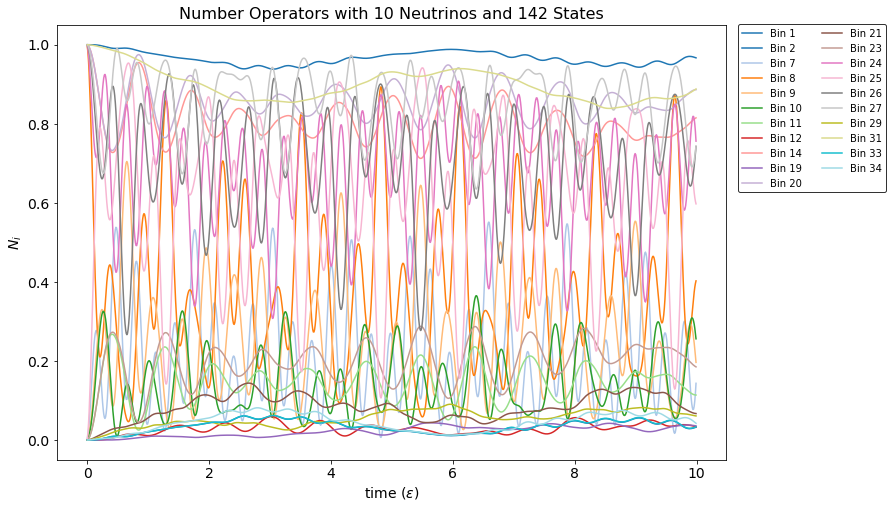

In [41]:
# plotting number operators
te.plot_number_operators(file_path)


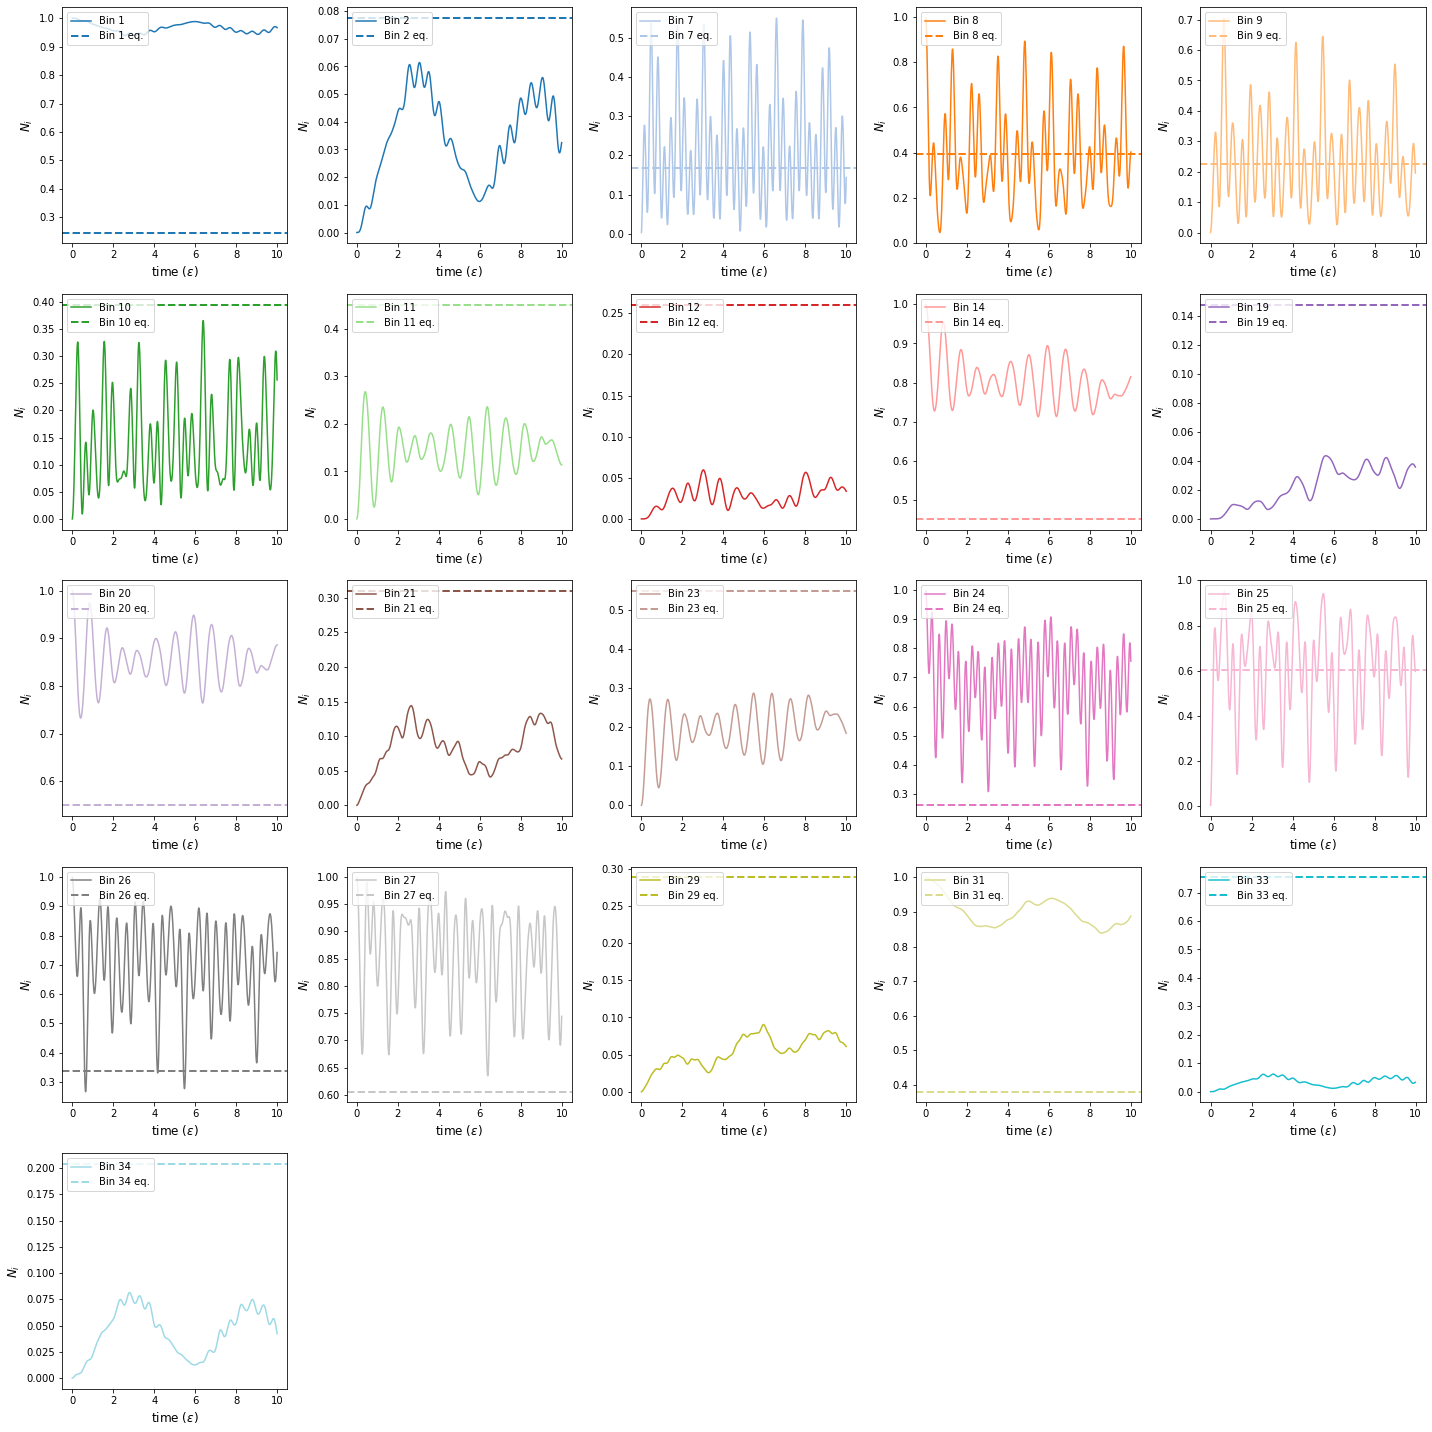

In [42]:
# plotting number operators with their equilibrium values
te.plot_eq(file_path)


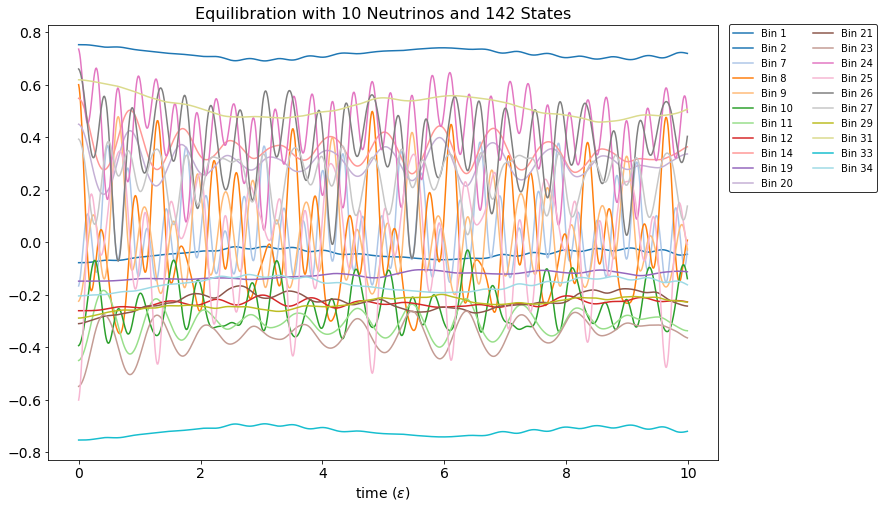

In [43]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)


## 10 Neutrinos with 70 States

In [44]:
%%time

# setting file path 
file_path = os.path.join(file_dir, 'N10_s70')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

init_state = config.init_state

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Number of neutrinos: 10
Initial state: [ 1  2 14 17 20 24 25 27 28 31]
Activated bins: [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 33, 34] 

Constructing 0th column of the Hamiltonian
Constructing 50th column of the Hamiltonian
CPU times: user 13.8 s, sys: 30.7 ms, total: 13.8 s
Wall time: 13.8 s


In [47]:
# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 3000, hamiltonian)


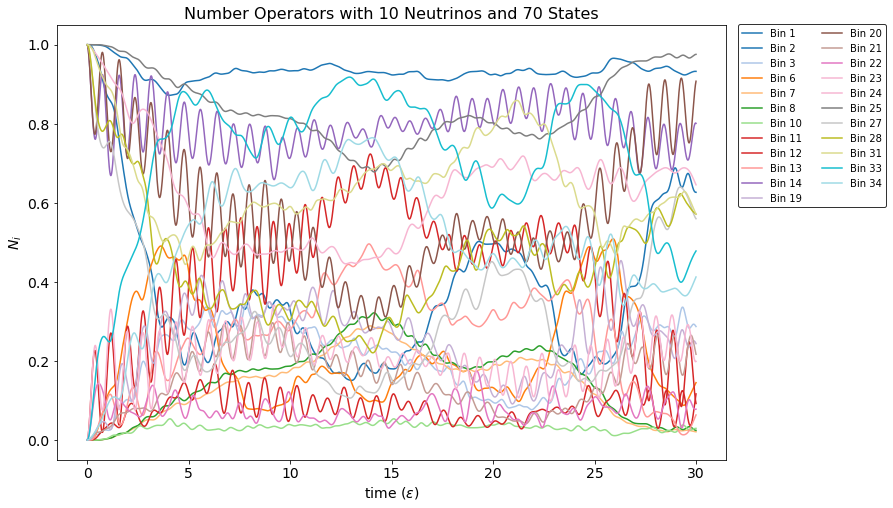

In [48]:
# plotting number operators
te.plot_number_operators(file_path)


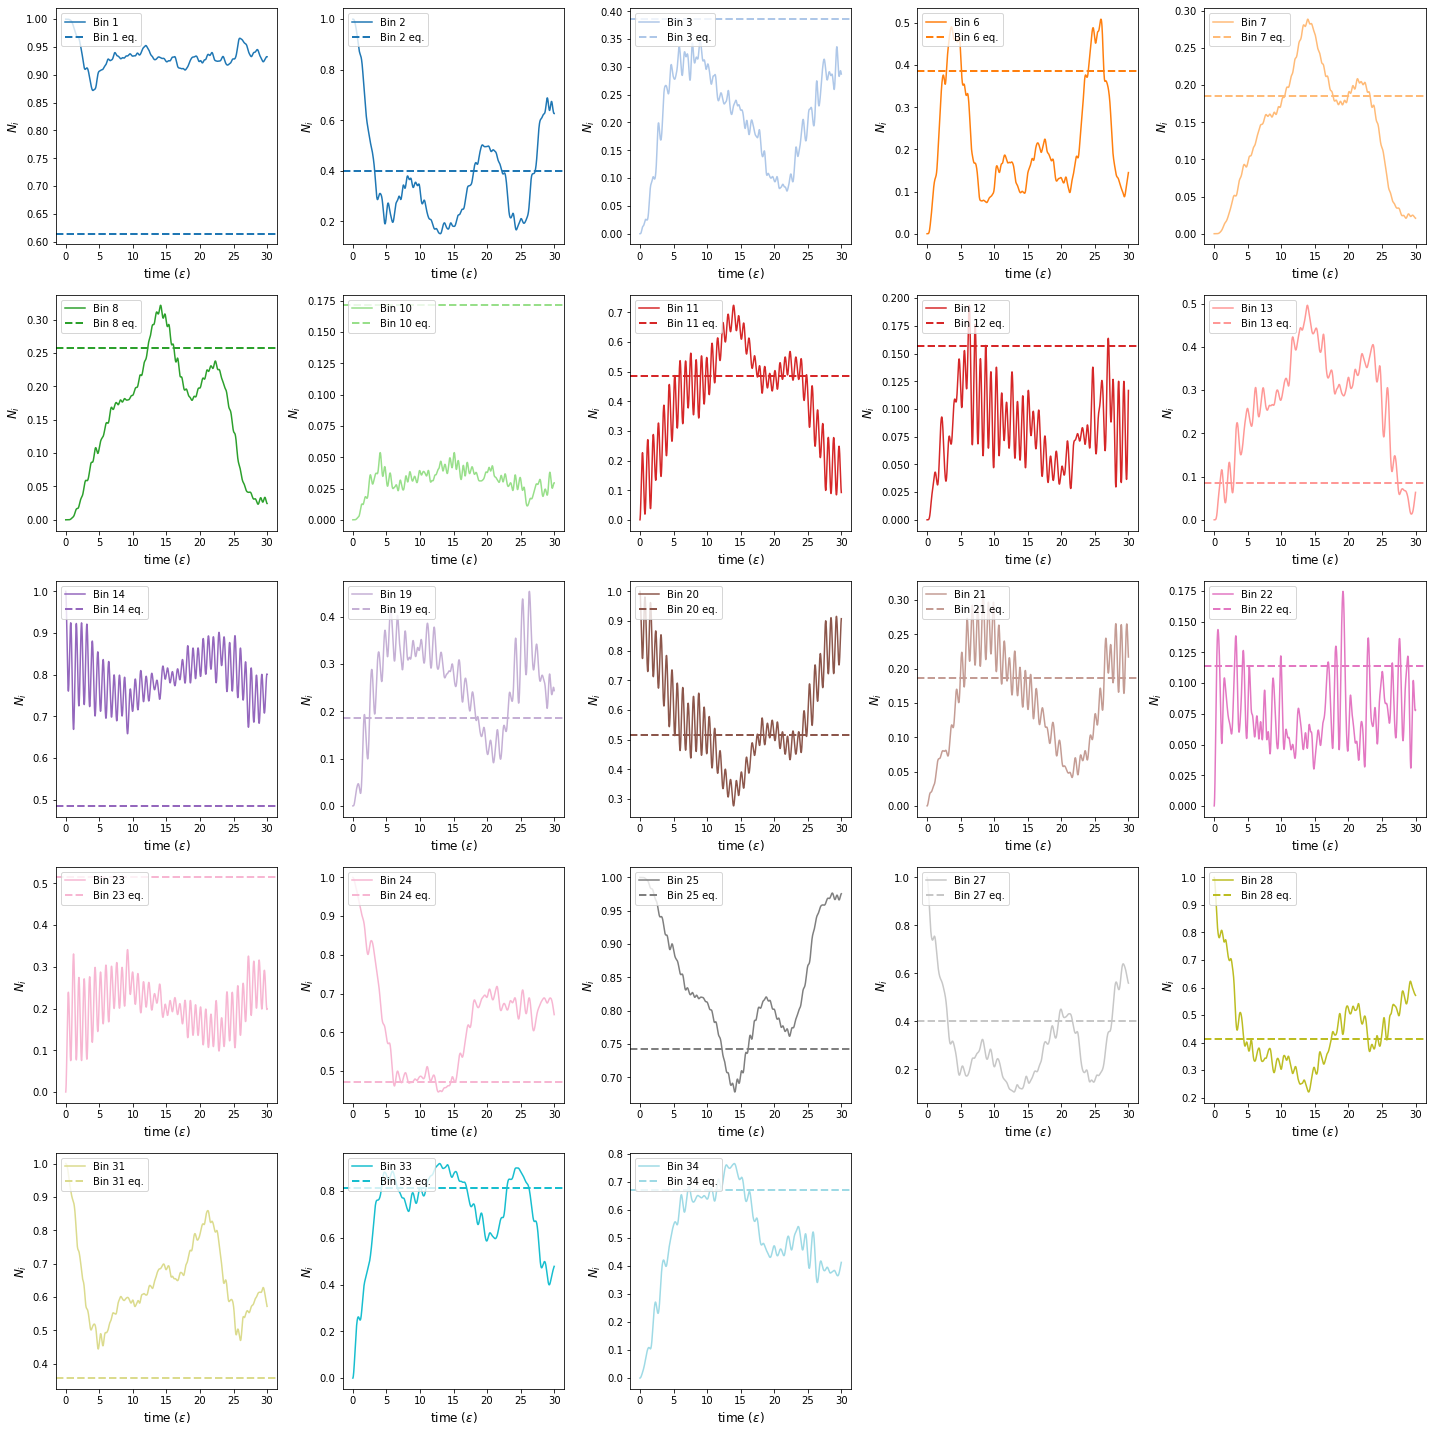

In [49]:
 # plotting number operators with their equilibrium values
te.plot_eq(file_path)


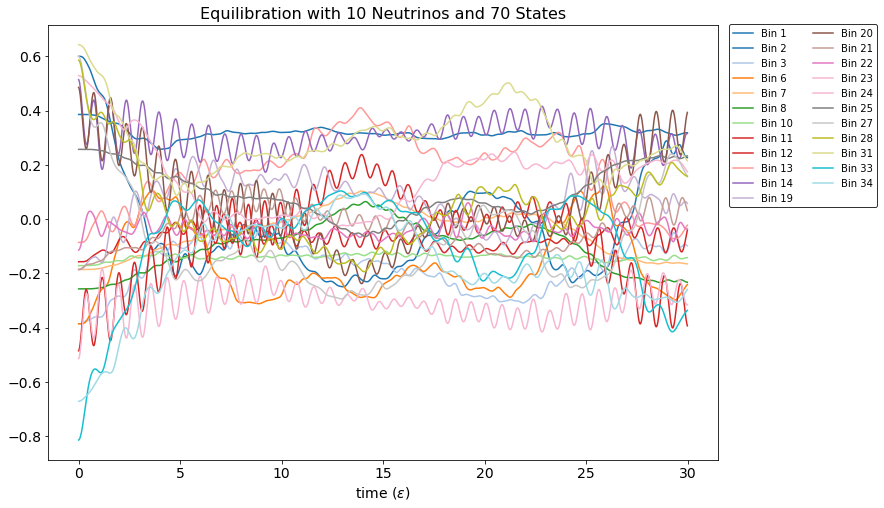

In [50]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)


## 10 Neutrinos with 25 States

In [51]:
%%time

# setting file path 
file_path = os.path.join(file_dir, 'N10_s25')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

init_state = config.init_state

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Number of neutrinos: 10
Initial state: [ 0  2  8 15 17 20 25 27 28 31]
Activated bins: [0, 1, 2, 3, 6, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 22, 25, 27, 28, 31, 32, 33, 34] 

Constructing 0th column of the Hamiltonian
CPU times: user 4.94 s, sys: 19.4 ms, total: 4.96 s
Wall time: 5.05 s


In [56]:
# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 5000, hamiltonian)


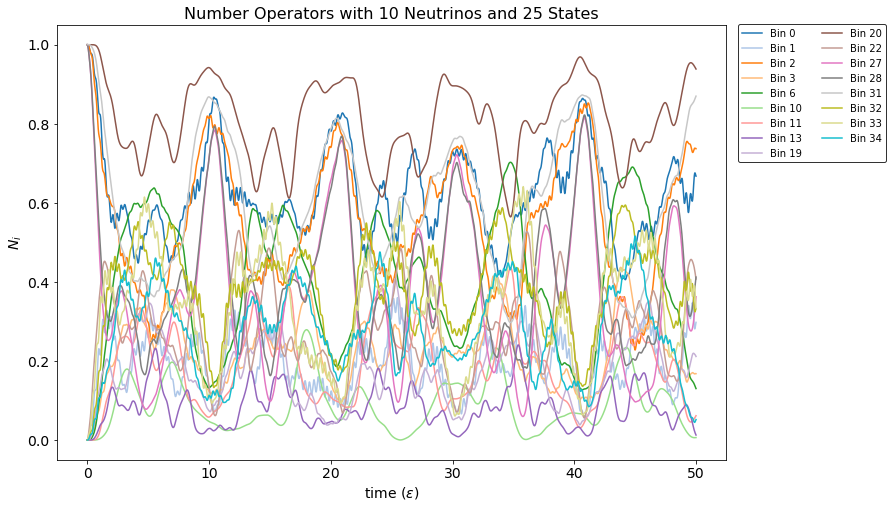

In [58]:
# plotting number operators
te.plot_number_operators(file_path)


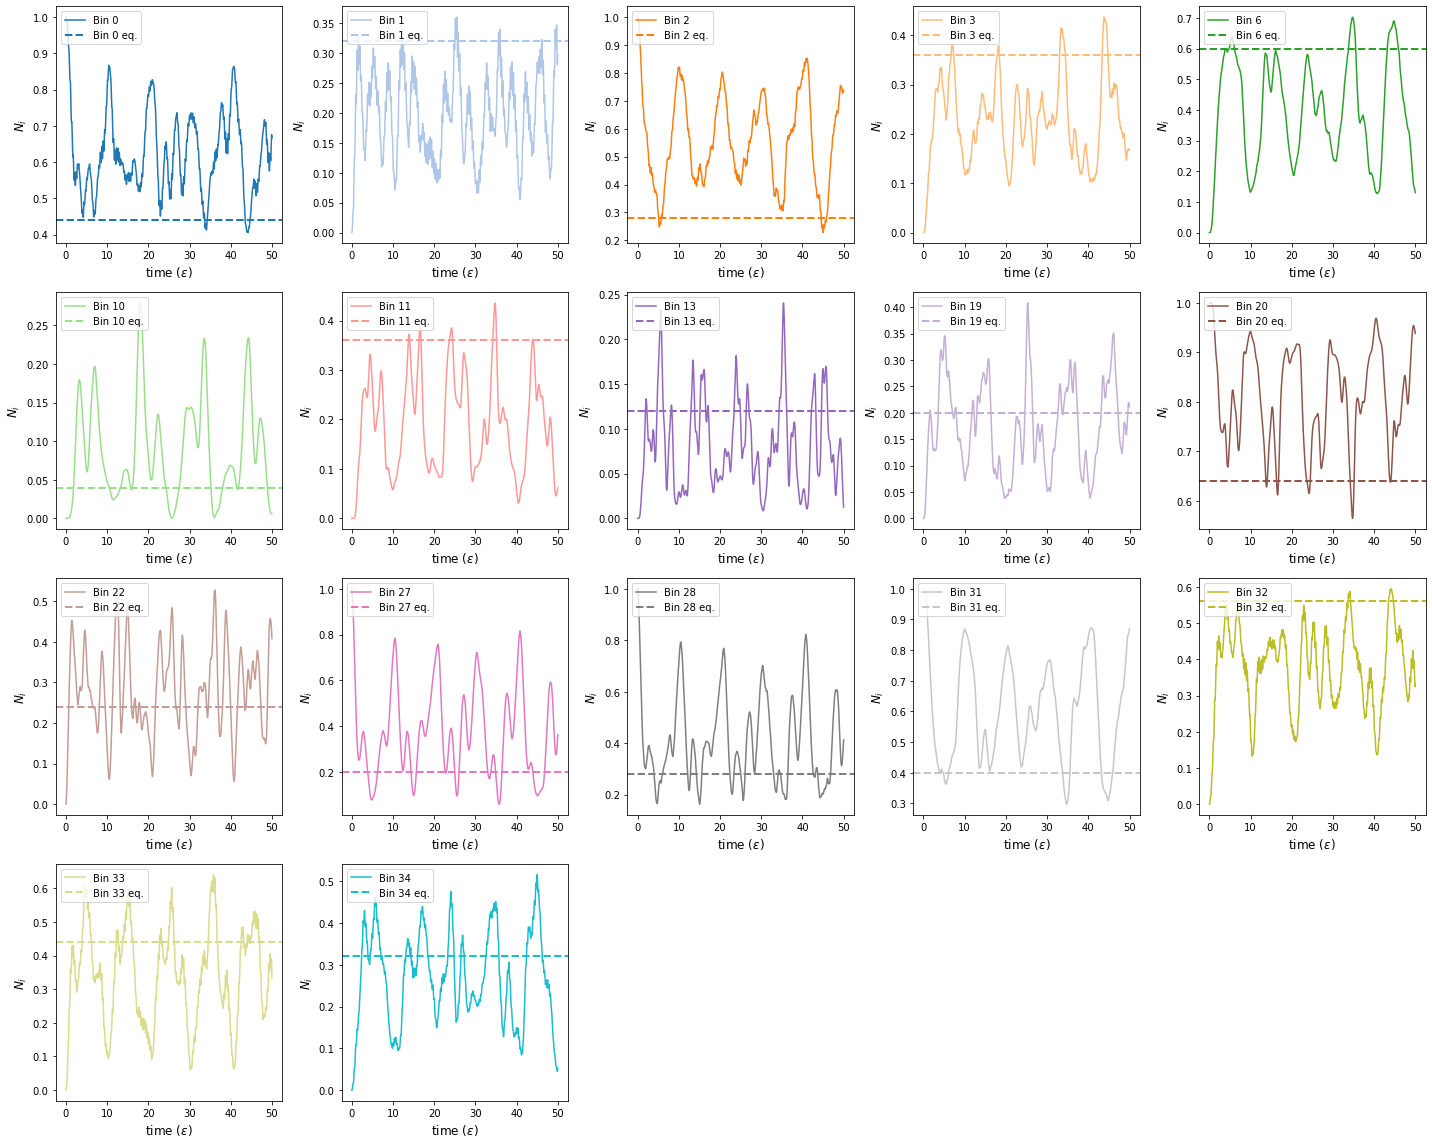

In [59]:
# plotting number operators with their equilibrium values
te.plot_eq(file_path)


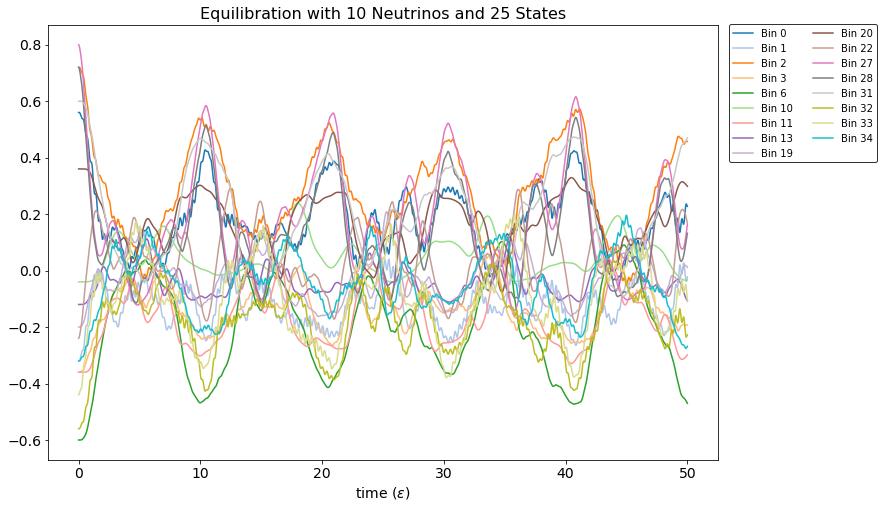

In [57]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)


## 10 Neutrinos with 9 States

In [60]:
%%time

# setting file path 
file_path = os.path.join(file_dir, 'N10_s9')

# loading in state information
config = StateConfig(file_path)
print(config, '\n')

init_state = config.init_state

# creating Hamiltonian object and diagonalizing
hamiltonian = Hamiltonian(momenta, config, dt)


Number of neutrinos: 10
Initial state: [ 0  1  8 15 17 24 25 27 28 31]
Activated bins: [0, 1, 2, 3, 8, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 31, 32, 33, 34] 

Constructing 0th column of the Hamiltonian
CPU times: user 1.79 s, sys: 2.72 ms, total: 1.79 s
Wall time: 1.8 s


In [62]:
# creating a time-evolution object which computes probability amplitude and number operators
te = TimeEvolution(config.init_state, 5000, hamiltonian)


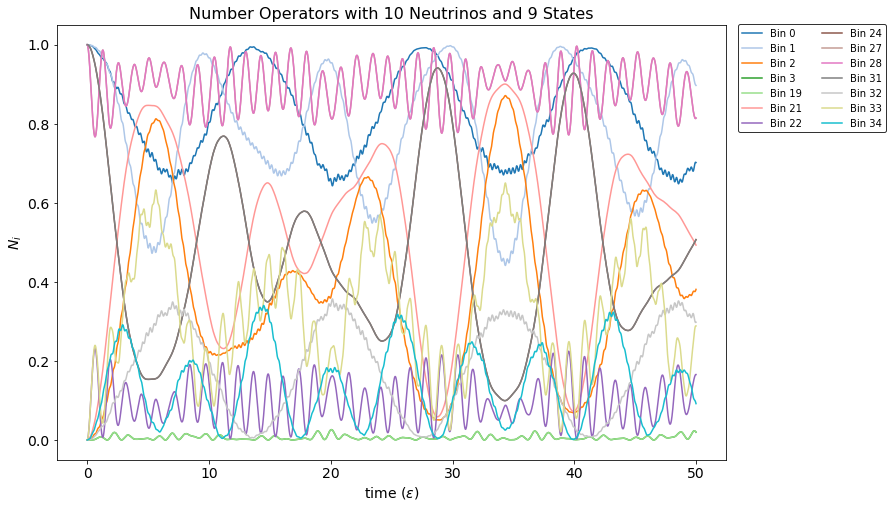

In [63]:
# plotting number operators
te.plot_number_operators(file_path)


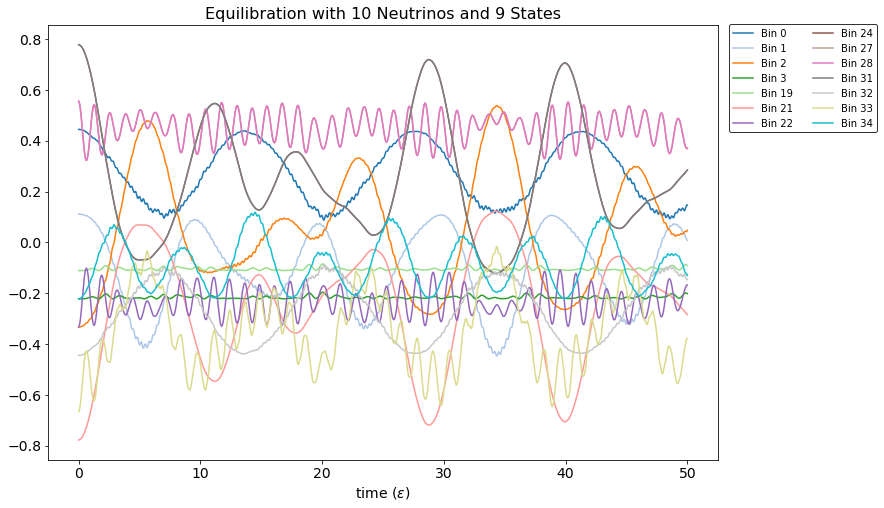

In [64]:
# plotting number operators minus equilibrium values
te.plot_eq_diff(file_path)
